In [61]:
import scipy.io as sio
import numpy as np
import scipy.optimize 
import matplotlib.pyplot as plt
from numpy.linalg import lstsq


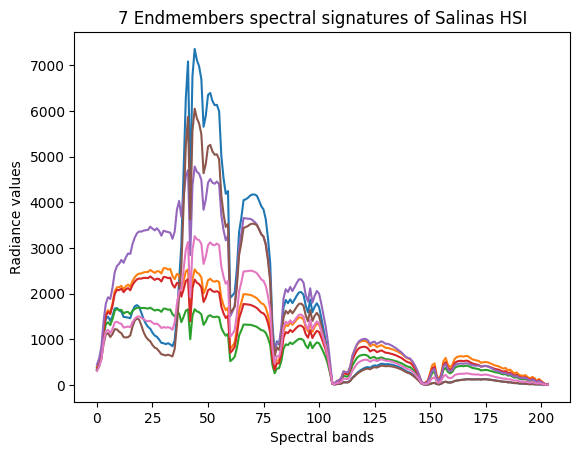

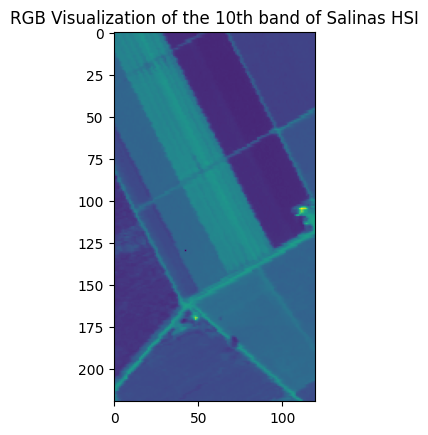

In [62]:
Salinas = sio.loadmat('Salinas_cube.mat')
HSI = Salinas['salinas_cube'] #Salinas HSI : 220x120x204

ends = sio.loadmat('Salinas_endmembers.mat') # Endmember's matrix: 204x7
endmembers = ends['salinas_endmembers']
fig = plt.figure()
plt.plot(endmembers)
plt.ylabel('Radiance values')
plt.xlabel('Spectral bands')
plt.title('7 Endmembers spectral signatures of Salinas HSI')
plt.show()

#Perform unmixing for the pixels corresponding to nonzero labels
ground_truth= sio.loadmat('Salinas_gt.mat')
labels=ground_truth['salinas_gt']

fig = plt.figure()
plt.imshow(HSI[:,:,10])
plt.title('RGB Visualization of the 10th band of Salinas HSI')
plt.show()
# For the non-negative least squares  unmixing algorithm  you can use the nnls function, see the following link:
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.nnls.html#scipy.optimize.nnls
# ..............
#
#..................

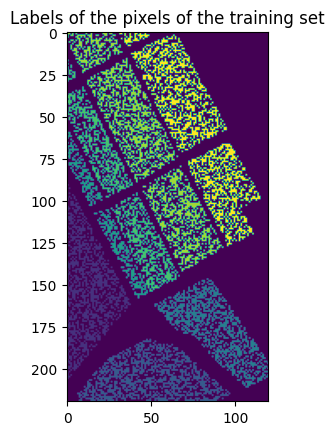

In [63]:
# Trainining set for classification 
Salinas_labels = sio.loadmat('classification_labels_Salinas.mat')
Training_Set = (np.reshape(Salinas_labels['training_set'],(120,220))).T
Test_Set = (np.reshape(Salinas_labels['test_set'],(120,220))).T
Operational_Set = (np.reshape(Salinas_labels['operational_set'],(120,220))).T

fig = plt.figure()
plt.imshow(Training_Set)
plt.title('Labels of the pixels of the training set')
plt.show()

In [64]:
def unmix_matrix(endmembers, HSI, labels, method="Least Squares"):
    height, width = labels.shape
    X = endmembers 
    n_endmembers = endmembers.shape[1]
    total_error = 0
    pixel_count = 0
    abundance_maps = np.zeros((height,width,n_endmembers))

    for i in range(height):
        for j in range(width):
            if labels[i,j] != 0:
                y = HSI[i,j,:]

                if method == "Least Squares":
                    theta, residuals, rank, s = lstsq(X, y, rcond=None)

                abundance_maps[i,j,:] = theta

                reconstructed = X @ theta
                error = np.sum((y - reconstructed)**2)
                total_error += error
                pixel_count += 1

    avg_error = total_error / pixel_count if pixel_count > 0 else 0

    return abundance_maps, avg_error

In [67]:
def plot_abundance_maps(abundance_maps, materials):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid for 7 maps
    axes = axes.ravel()  # Flatten axes for easier indexing
    
    for i in range(7):
        im = axes[i].imshow(abundance_maps[:, :, i])
        axes[i].set_title(f'Abundance Map: {materials[i]}')
        plt.colorbar(im, ax=axes[i])
    
    # Remove the last empty subplot
    fig.delaxes(axes[7])
    fig.delaxes(axes[8])

    plt.show()

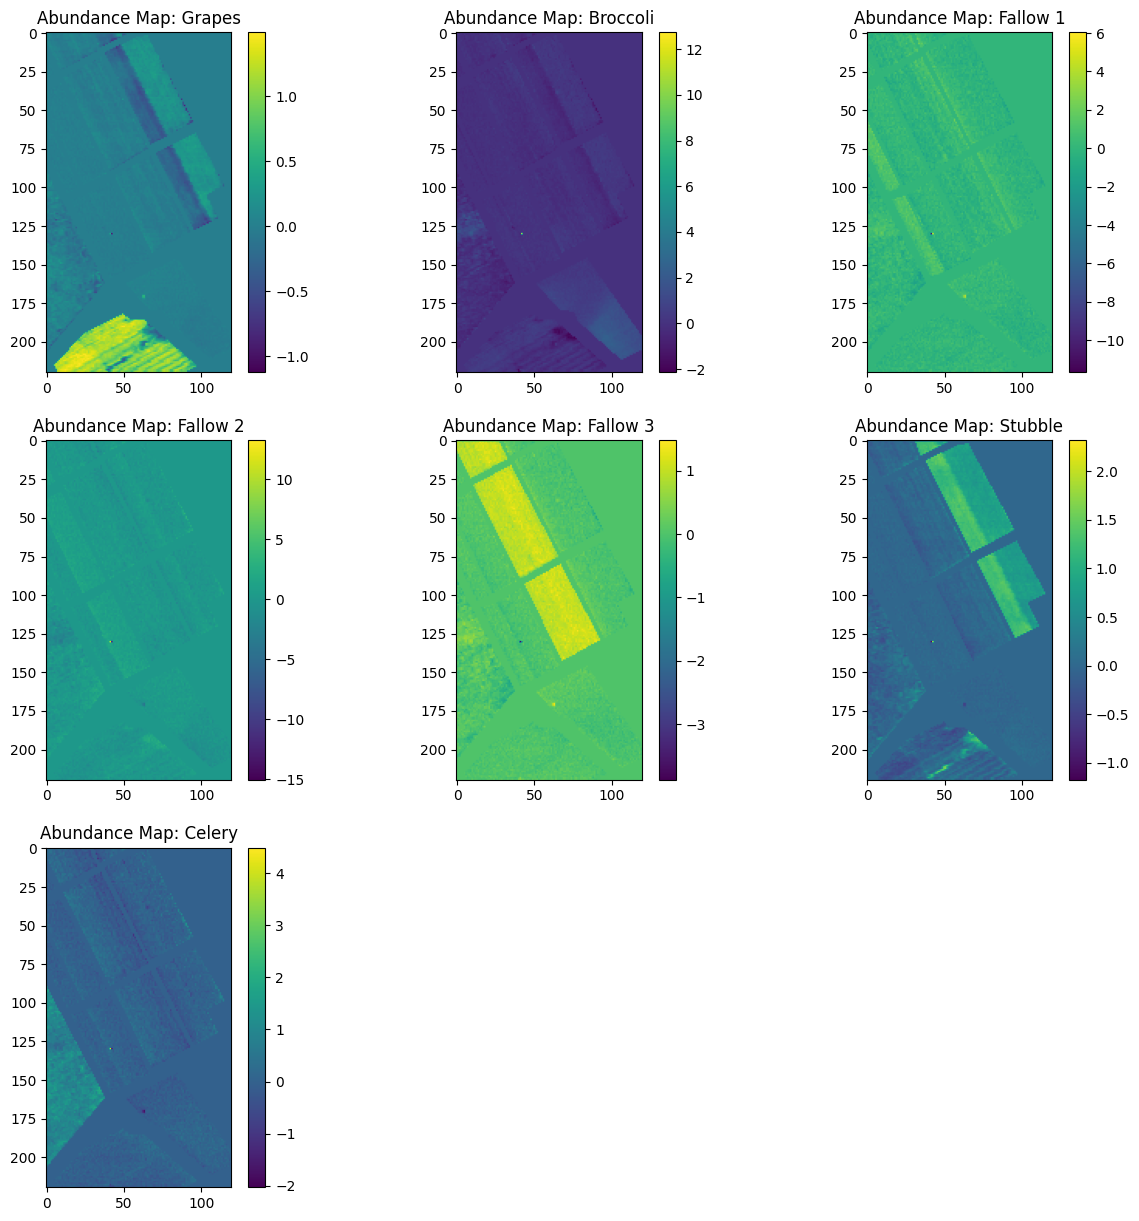

Average Reconstruction Error: 35058.880662772615


In [68]:
# List of materials
materials = ['Grapes', 'Broccoli', 'Fallow 1', 'Fallow 2', 
            'Fallow 3', 'Stubble', 'Celery']

# Run the unmixing
abundance_maps, reconstruction_error = unmix_matrix(endmembers, HSI, labels)

# Plot the 7 abundance maps
plot_abundance_maps(abundance_maps, materials)

print(f"Average Reconstruction Error: {reconstruction_error}")